In [0]:
import numpy as np
import pandas as pd
from jinja2 import Template
from IPython.display import HTML

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soumyasinha29","key":"f0a42ca0b4e9ba6c48009779f3231127"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Mar 25 15:57 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# List available datasets.
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

  0% 0.00/412k [00:00<?, ?B/s]
100% 412k/412k [00:00<00:00, 56.5MB/s]


In [7]:
!unzip novel-corona-virus-2019-dataset.zip

Archive:  novel-corona-virus-2019-dataset.zip
  inflating: COVID19_line_list_data.csv  
  inflating: COVID19_open_line_list.csv  
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_recovered.csv  


In [8]:
!ls

covid_19_data.csv		     sample_data
COVID19_line_list_data.csv	     time_series_covid_19_confirmed.csv
COVID19_open_line_list.csv	     time_series_covid_19_deaths.csv
kaggle.json			     time_series_covid_19_recovered.csv
novel-corona-virus-2019-dataset.zip


In [0]:
from matplotlib import pyplot as plt
import os, random, cv2
%matplotlib inline

In [11]:
df = pd.read_csv("covid_19_data.csv")
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [12]:
df2 = pd.read_csv("COVID19_open_line_list.csv")
df2.head(10)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,NaN,NaN,Lu'an City,Anhui,China,1.0,31.759410,116.315100,admin2,NaN,NaN,24.01.2020,pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.bjnews.com.cn/news/2020/01/24/67877...,NaN,NaN,NaN,NaN,NaN,NaN,Lu'an City,Anhui,China,341500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,42,female,Fuyang City,Anhui,China,1.0,32.918800,115.703600,admin2,21.01.2020,21.01.2020,22.01.2020,fever,no,19.01.2020,Wuhan,NaN,transportation drivers often travel between Wu...,NaN,NaN,https://baijiahao.baidu.com/s?id=1656791146764...,NaN,NaN,NaN,NaN,NaN,NaN,Fuyang City,Anhui,China,341200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,NaN,female,Huaibei City,Anhui,China,1.0,33.727220,116.742400,admin2,NaN,NaN,25.01.2020,NaN,no,13.01.2020,Wuhan,NaN,left Wuhan,NaN,NaN,http://wjw.huaibei.gov.cn/xxfb/tzgg/55968731.html,NaN,NaN,NaN,NaN,NaN,NaN,Huaibei City,Anhui,China,340600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,59,female,Huainan City,Anhui,China,1.0,32.757380,116.734000,admin2,19.01.2020,24.01.2020,26.01.2020,fever,yes,22.01.2020,Wuhan,NaN,arrived in Huainan from Wuhan,NaN,NaN,https://baijiahao.baidu.com/s?id=1656845876146...,NaN,NaN,NaN,NaN,NaN,NaN,Huainan City,Anhui,China,340400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,30,male,Hefei City,Anhui,China,1.0,31.794440,117.342800,admin2,17.01.2020,22.01.2020,23.01.2020,NaN,yes,21.01.2020,Wuhan,NaN,arrived in Hefei from Wuhan,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,NaN,Hefei City,Anhui,China,340100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df3 = pd.read_csv("COVID19_line_list_data.csv")
df3.head(10)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,1/15/2020,0.0,NaN,NaN,NaN,0,1.0,0,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,01/11/20,0.0,NaN,NaN,NaN,0,1.0,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,1/14/2020,0.0,1/20/2020,01/10/20,01/11/20,1,0.0,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,01/09/20,0.0,1/14/2020,01/03/20,01/04/20,1,0.0,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,1/16/2020,0.0,1/20/2020,01/08/20,1/16/2020,1,0.0,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df4 = pd.read_csv("time_series_covid_19_confirmed.csv")
df4.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1306.0
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,9,12,13,21,21,27,32,32,39,46,64,64,73,103,103,186,231,271,424,424,424.0
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,533,533.0
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,1,1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7,7,9,9,10,10,10,11,11,15,18,21,21,36,49,57,71,94,121,121,121,229,296,296.0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,1,3,2,3,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,9,9,9,11,11,13,13,13,15,15,18,20,20,35,46,61,68,78,94,144,184,221,221,221.0
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,5,7,7,7,33,35,37,51,53,84,84.0


In [13]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,11341.000000,11341.000000,11341.000000,11341.000000
mean,5671.000000,491.569615,17.524116,174.971078
std,3274.009036,4295.461678,204.529848,2334.484509
min,1.000000,0.000000,0.000000,0.000000
25%,2836.000000,1.000000,0.000000,0.000000
50%,5671.000000,5.000000,0.000000,0.000000
75%,8506.000000,71.000000,0.000000,2.000000
max,11341.000000,67800.000000,6077.000000,59882.000000


In [14]:
df2.describe()

,ID,wuhan(0)_not_wuhan(1),latitude,longitude,chronic_disease_binary,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
count,13173.000000,13170.0,13147.000000,13147.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6769.250436,1.0,31.994650,110.495353,0.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3920.886020,0.0,7.536335,27.985144,0.460889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,-37.813600,-124.953070,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3351.000000,1.0,27.905380,111.729600,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6865.000000,1.0,31.759410,115.441800,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10180.000000,1.0,35.781340,120.440400,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,13479.000000,1.0,69.649468,153.400000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df4.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,309.000000
mean,30.285772,-33.097762,1.107784,1.303393,1.878244,2.862275,4.227545,5.842315,11.133733,12.307385,16.435130,19.814371,24.027944,33.506986,39.682635,47.688623,55.159681,61.510978,68.644711,74.091816,80.139721,85.353293,89.425150,90.261477,120.495010,133.502994,137.784431,142.163673,146.223553,149.972056,150.976048,152.089820,153.339321,156.844311,157.614770,158.818363,160.504990,162.465070,165.177645,167.904192,171.678643,176.385230,180.251497,185.309381,189.860279,195.373253,203.161677,211.219561,219.151697,226.668663,236.710579,251.227545,256.173653,289.806387,311.564870,334.223553,362.329341,393.497006,428.962076,484.447106,543.245509,607.832335,670.568862,1087.391586
std,19.870544,80.661210,19.886889,19.969170,24.875593,34.637942,48.422475,65.253024,159.914427,160.961540,221.780645,262.961897,323.566468,502.615036,607.548748,748.710021,882.244067,991.730346,1118.724934,1214.747740,1327.783957,1421.458167,1494.655348,1494.946770,2156.466164,2433.137132,2515.465626,2601.788810,2682.473901,2758.066918,2773.680974,2792.030727,2801.942394,2865.423791,2865.488608,2874.634626,2896.975752,2915.070394,2933.833919,2948.854288,2969.290939,2996.581051,3007.586232,3016.840172,3025.387042,3035.921413,3048.869642,3061.913470,3074.291757,3088.859710,3101.021350,3125.935948,3133.420832,3203.084891,3263.324717,3332.995975,3415.516311,3511.636870,3642.374951,3832.930820,4064.084657,4337.179809,4594.278660,5814.685942
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.341700,-90.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,37.251900,-73.182200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

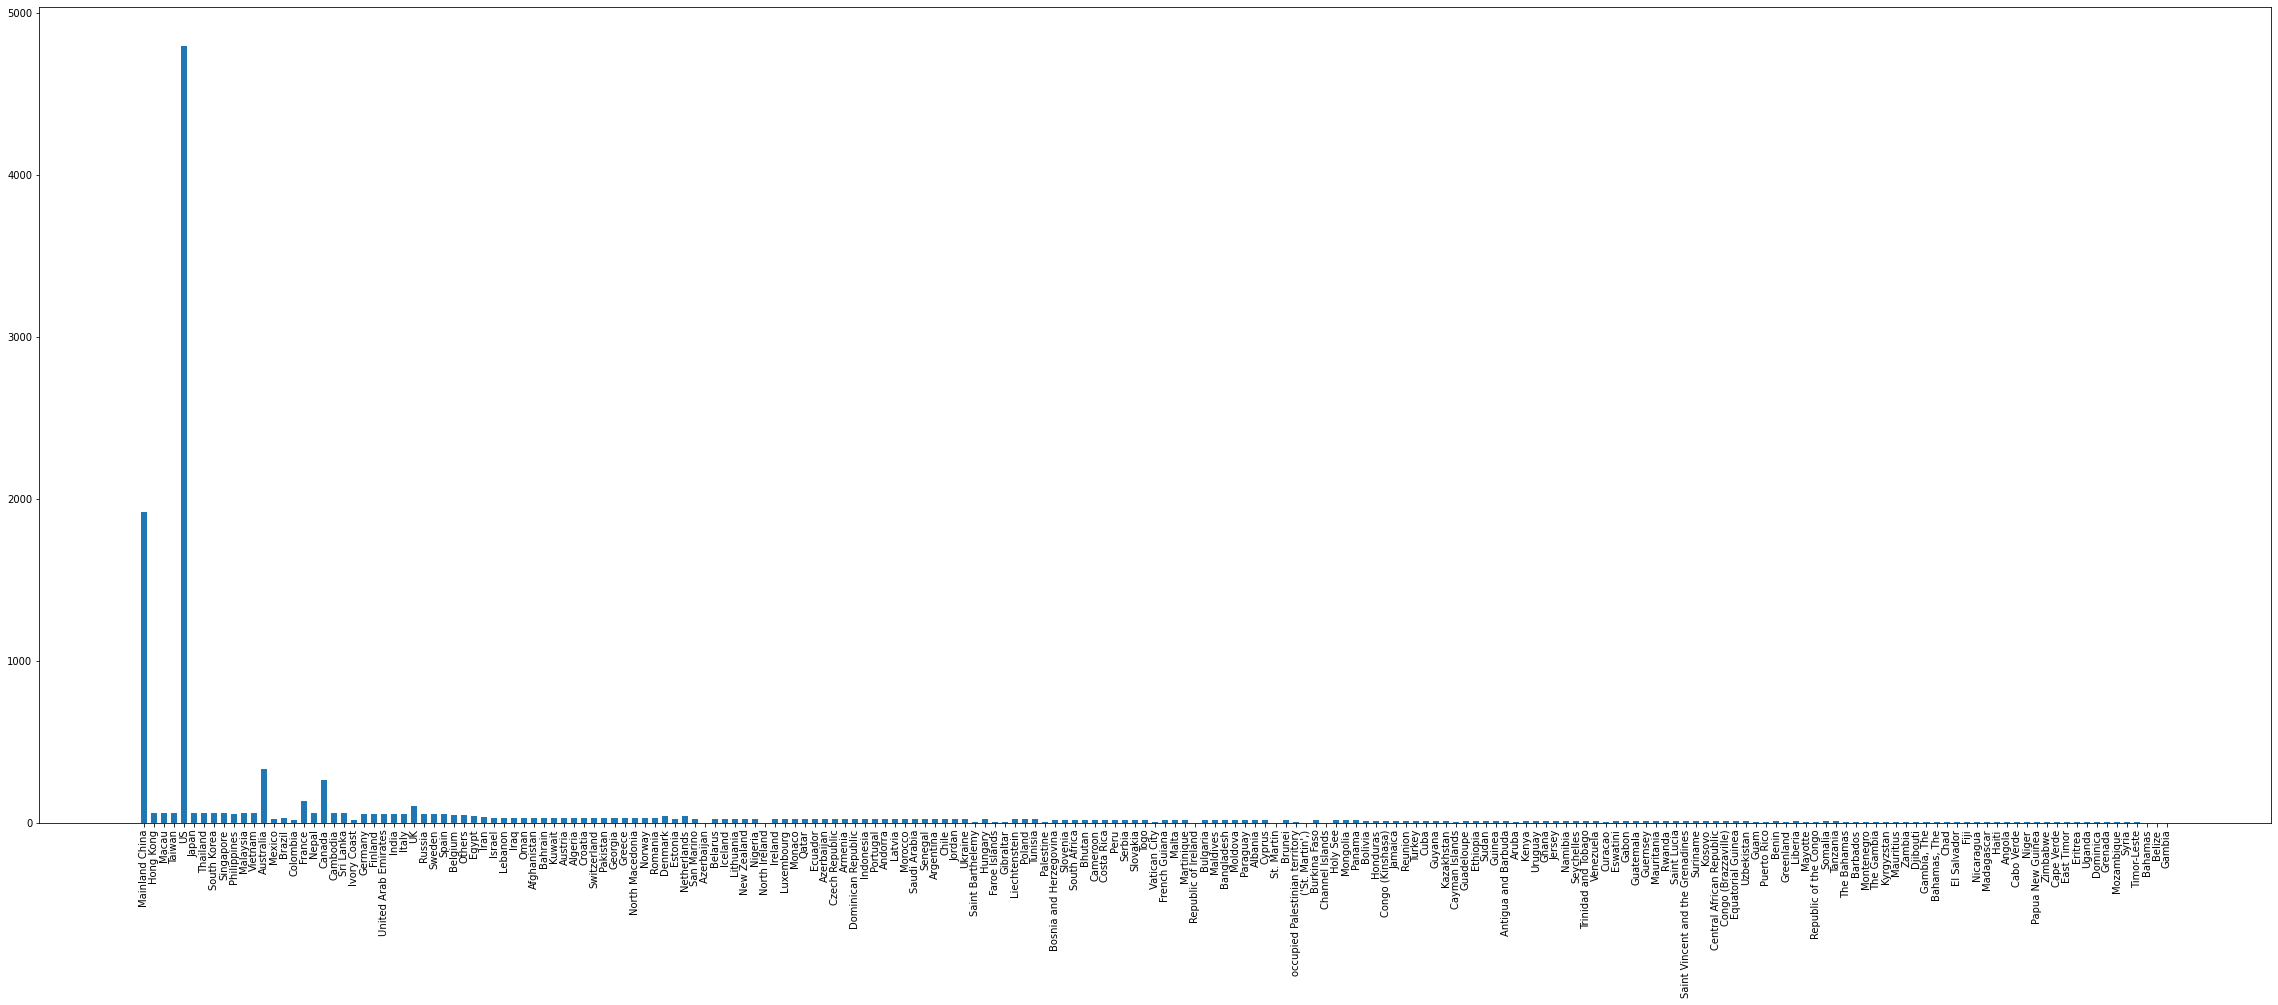

In [16]:
# Let's encode the labels
labels_map = {}
inv_labels_map = {}
count = 0
for label in df['Country/Region']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
# print("Label Map: ", labels_map)
# print("No. of Labels are: ", count)
# Let's check the distribution of the classes we have
labels_count = {}
for label in df['Country/Region']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
# print(labels_count)
plt.figure(figsize=(40,15))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

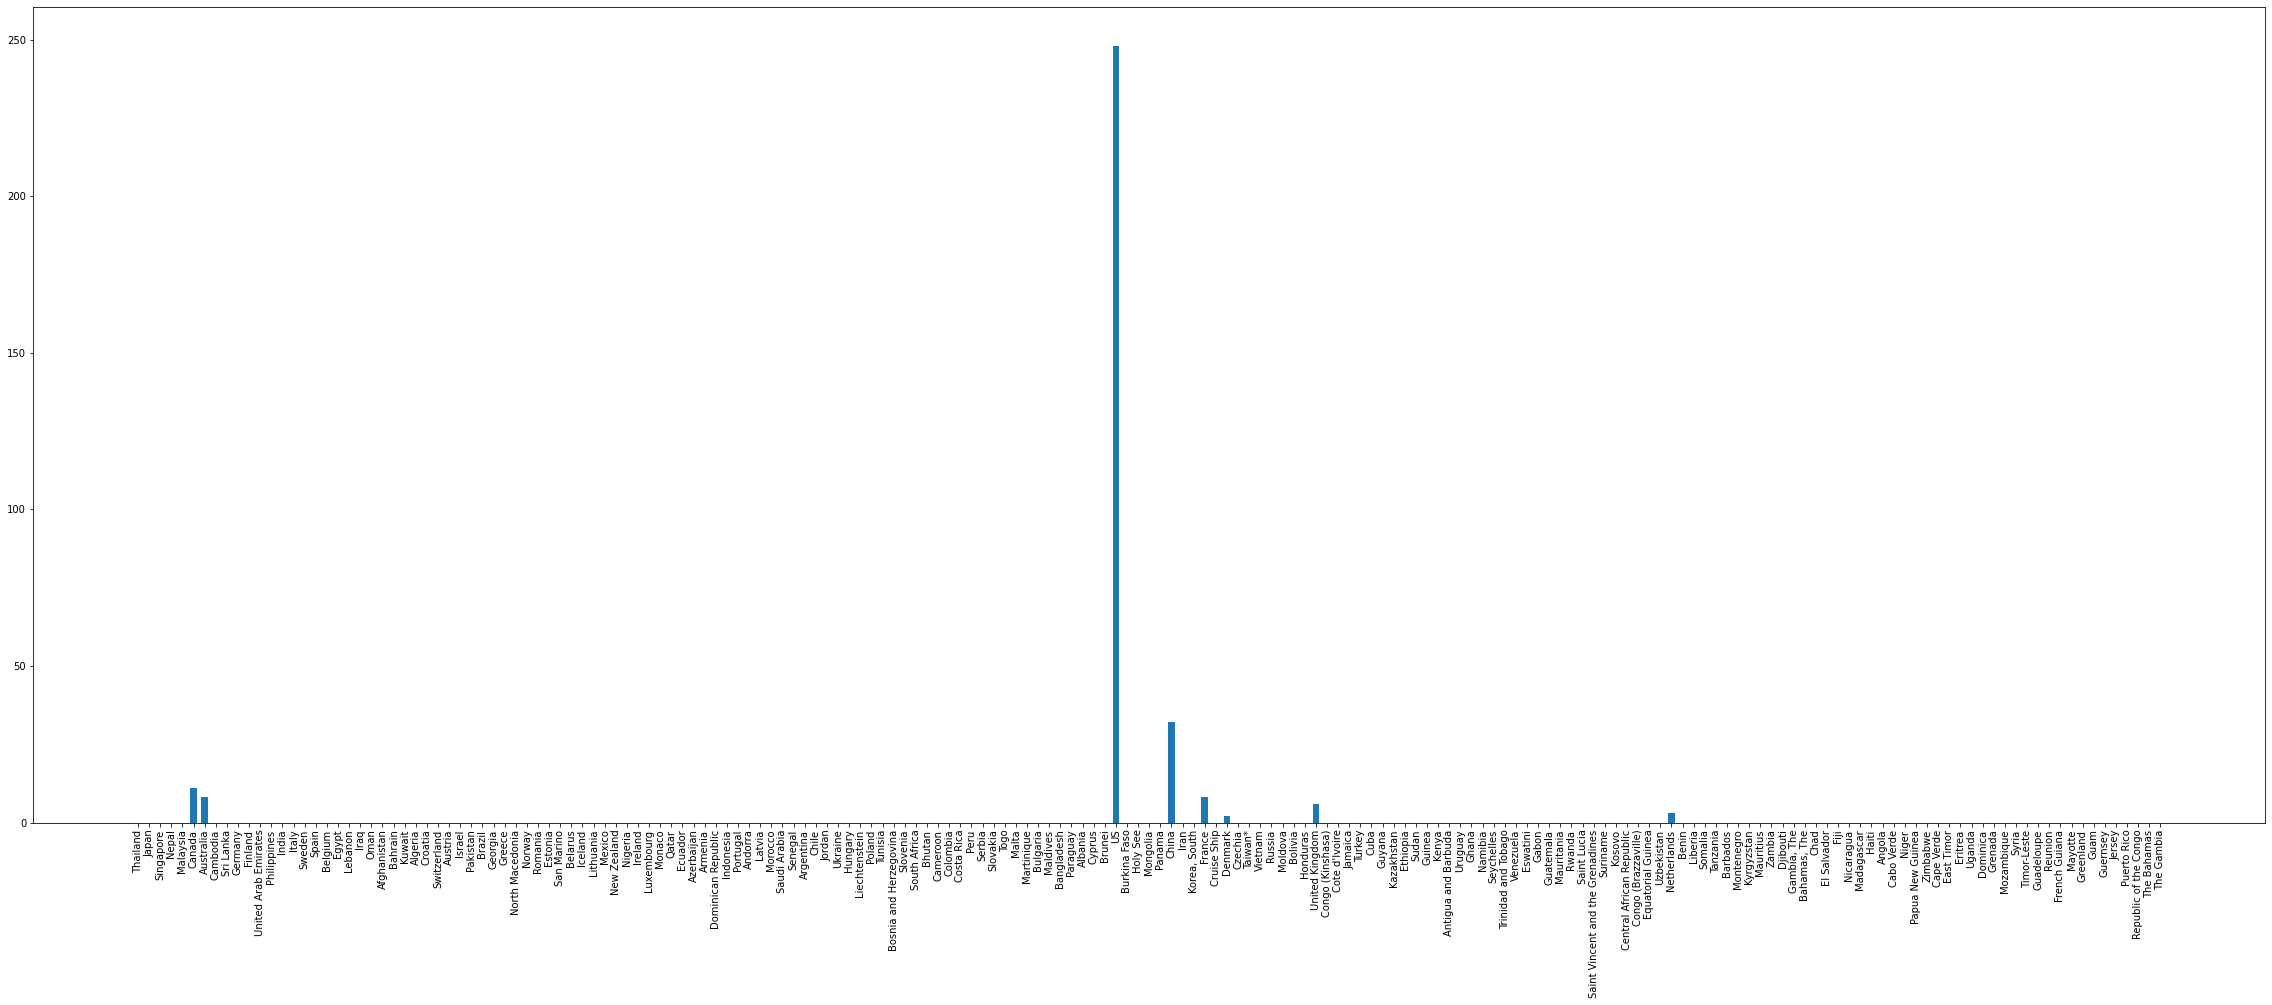

In [20]:
# Let's encode the labels
labels_map = {}
inv_labels_map = {}
count = 0
for label in df4['Country/Region']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
# print("Label Map: ", labels_map)
# print("No. of Labels are: ", count)
# Let's check the distribution of the classes we have
labels_count = {}
for label in df4['Country/Region']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
# print(labels_count)
plt.figure(figsize=(40,15))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

In [22]:
  df5 = pd.read_csv("time_series_covid_19_deaths.csv")
df5.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,4,10,10.0
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,4,4,7,7,8,10,10,10.0
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6.0
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [26]:
  df6 = pd.read_csv("time_series_covid_19_recovered.csv")
df6.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,12,12,12,14,15,15,15,15,17,17,21,21,22,22,22,28,28,28,31,31,31,31,31,31,31,31,33,34,34,35,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,9,9,9,9,12,12,12,13,18,18,22,22,22,22,22,22,22,22,32,32,32,43,43,43,46,76,76,76,101,118,118,118,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,72,78,78,78,78,78,78,78,78,78,96,96,97,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,18,18,22,22,22,22,23,24,24,24,26,26,26,35,42,42,49,60,75,87,114,139,139.0
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4.0
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4.0
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,70,70.0
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8.0
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0


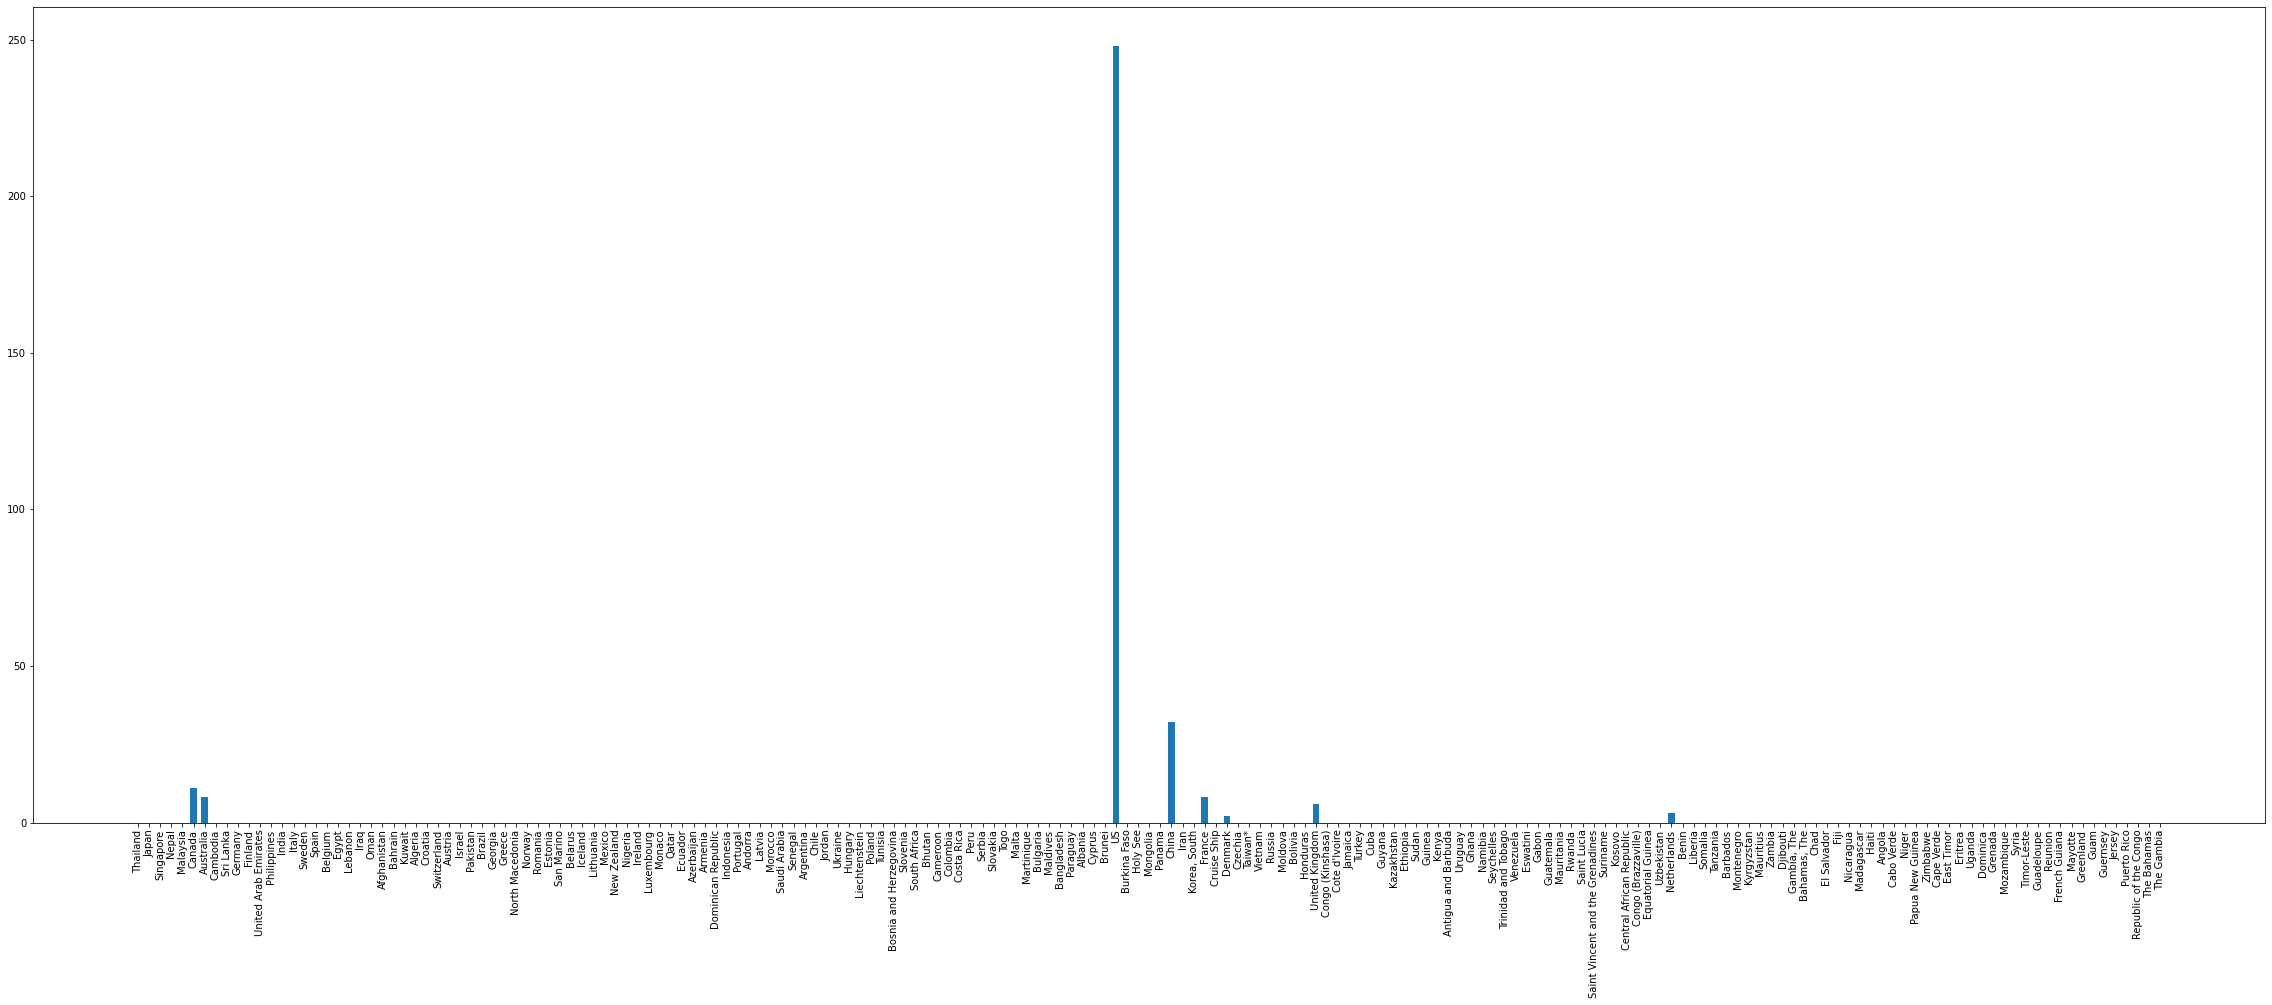

In [24]:
# Let's encode the labels
labels_map = {}
inv_labels_map = {}
count = 0
for label in df5['Country/Region']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
# print("Label Map: ", labels_map)
# print("No. of Labels are: ", count)
# Let's check the distribution of the classes we have
labels_count = {}
for label in df5['Country/Region']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
# print(labels_count)
plt.figure(figsize=(40,15))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

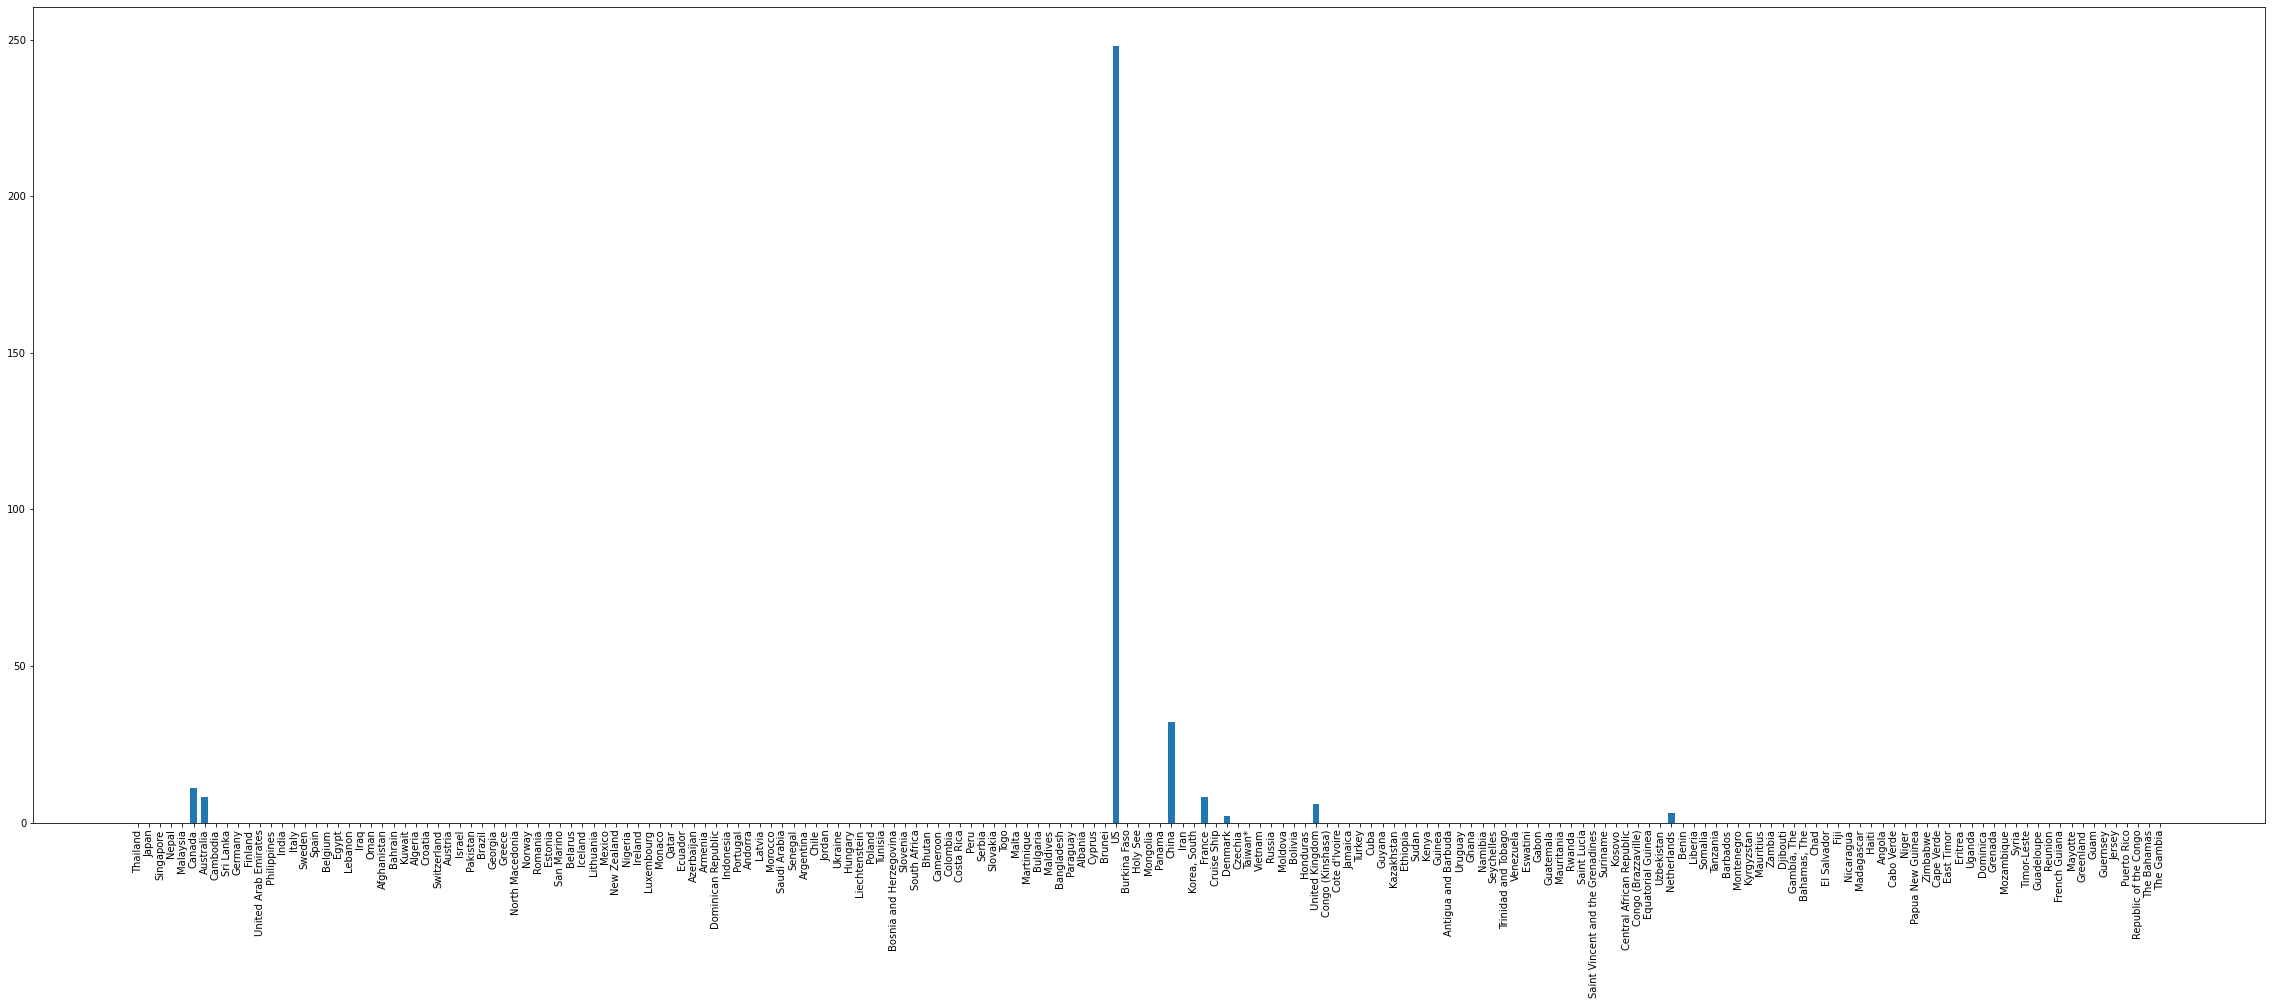

In [27]:
# Let's encode the labels
labels_map = {}
inv_labels_map = {}
count = 0
for label in df6['Country/Region']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
# print("Label Map: ", labels_map)
# print("No. of Labels are: ", count)
# Let's check the distribution of the classes we have
labels_count = {}
for label in df6['Country/Region']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
# print(labels_count)
plt.figure(figsize=(40,15))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

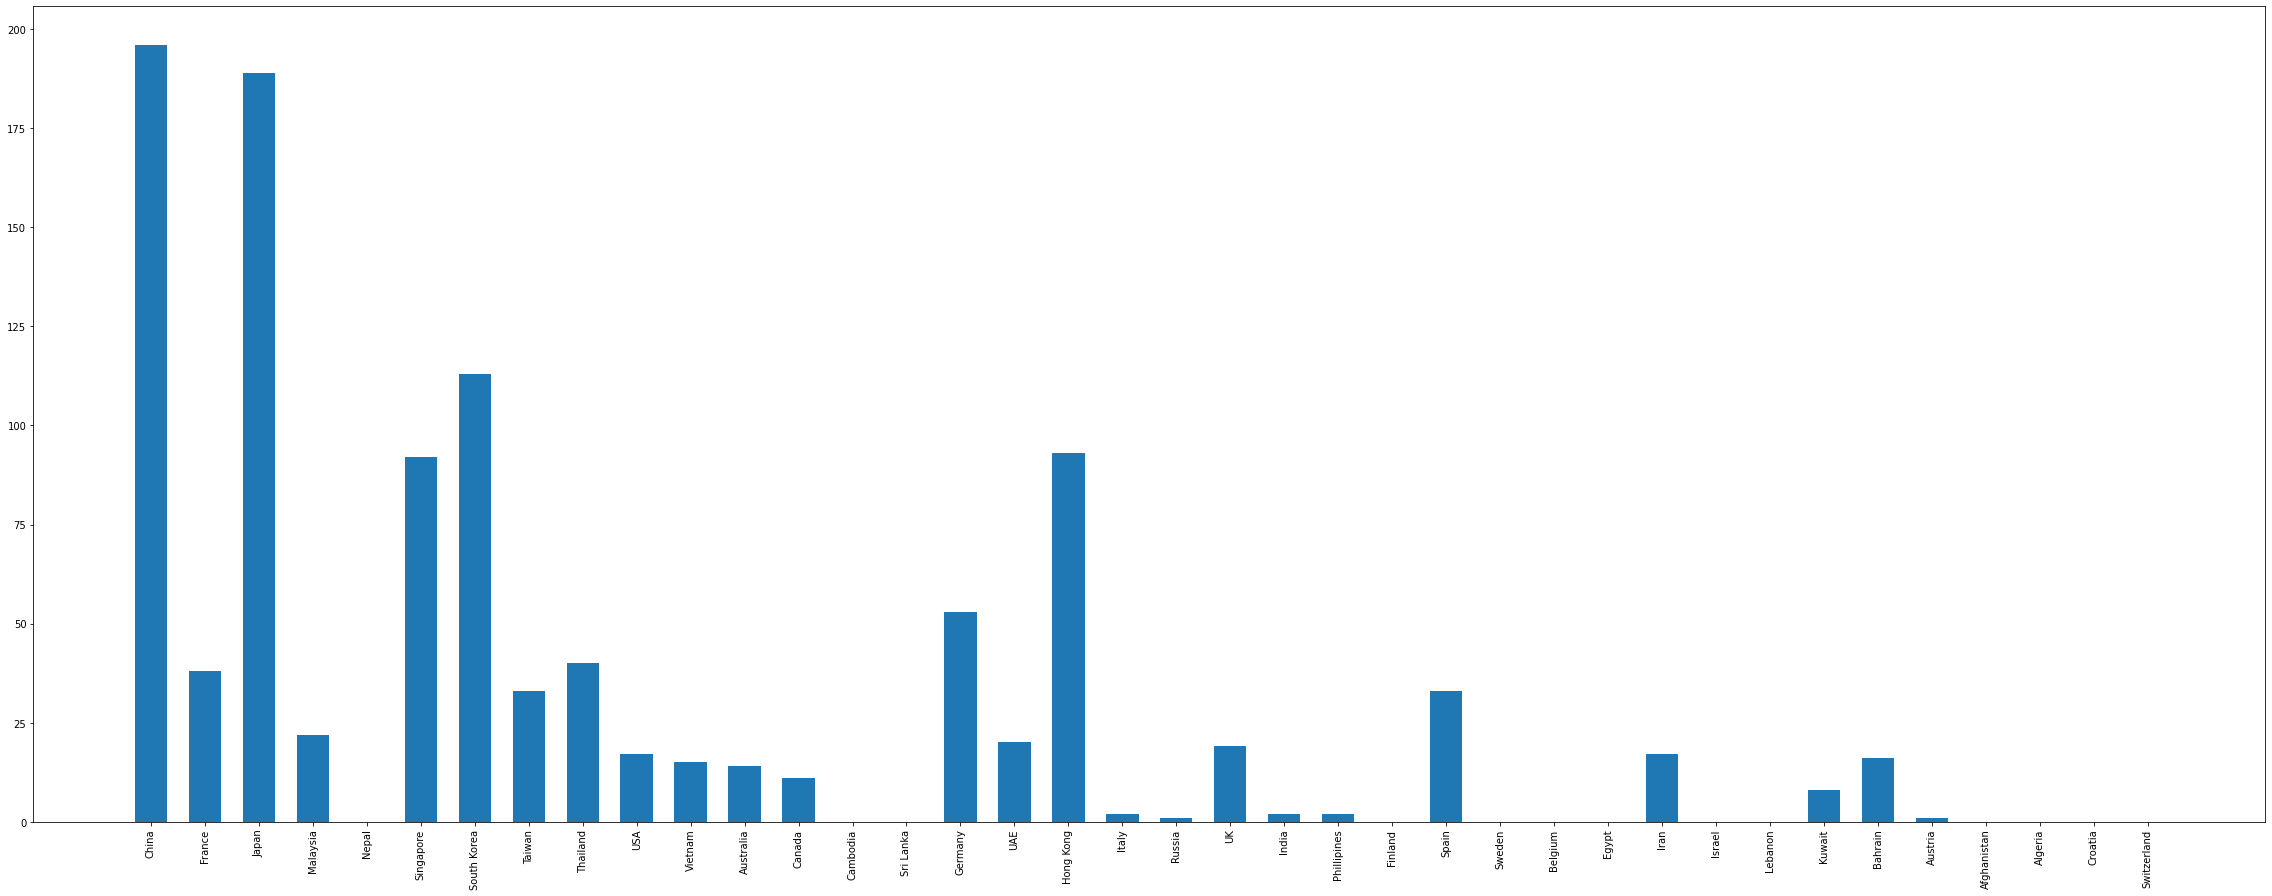

In [30]:
# Let's encode the labels
labels_map = {}
inv_labels_map = {}
count = 0
for label in df3['country']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
# print("Label Map: ", labels_map)
# print("No. of Labels are: ", count)
# Let's check the distribution of the classes we have
labels_count = {}
for label in df3['country']:
  if(label in labels_count):
    labels_count[label] = labels_count[label] + 1
  else:
    labels_count[label] = 0
# print(labels_count)
plt.figure(figsize=(40,15))
plt.bar(list(labels_count.keys()), list(labels_count.values()),width=0.6)
plt.xticks(rotation = 90)
plt.show()

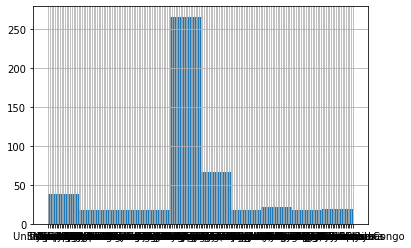

In [34]:
df5['Country/Region'].hist(bins=10)

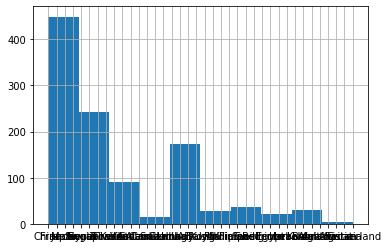

In [35]:
df3['country'].hist(bins=10)

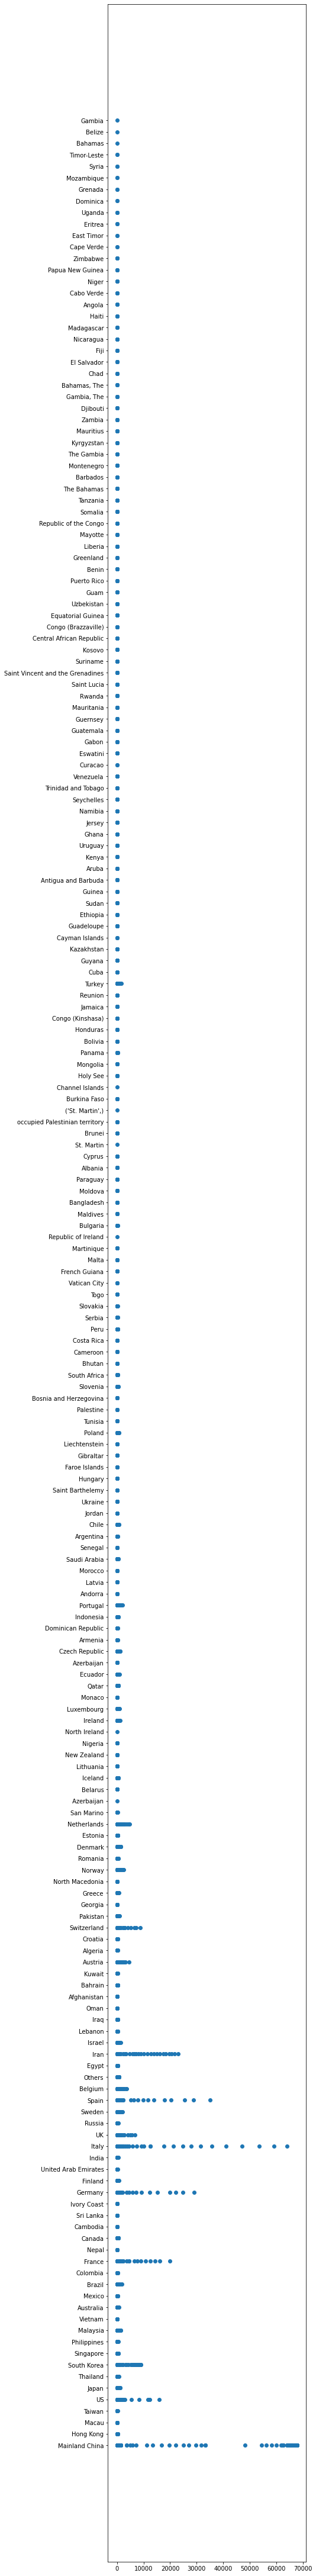

In [41]:
plt.scatter(df['Confirmed'], df['Country/Region']) 
ax = plt.gca()
ttl = ax.title
ttl.set_position([10, 5])
plt.subplots_adjust(top=20)
plt.subplots_adjust(bottom=5)

plt.draw()
plt.show() 
  